In [1]:
from defillama import defillama

In [2]:
import pandas as pd
from pandas.plotting import table
import json
import os
import copy
import time
from datetime import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from bokeh.plotting import figure, show
from bokeh.models import Span
from bokeh.io import output_notebook
from bokeh.models import Range1d
from bokeh.models import ColumnDataSource as cds
from bokeh.models import HoverTool
from bokeh.models import NumeralTickFormatter
from bokeh.io import curdoc

output_notebook()

Loading BokehJS ...

In [4]:
from fbprophet import Prophet

C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [5]:
PATH = os.getcwd()

### Using DeFiLlama APIs

In [6]:
# Fetch all protocols from DeFiLlama
all_protocols = defillama().get_protocols()
type(all_protocols)

list

In [7]:
df = pd.DataFrame(all_protocols)
df.head(5)

,id,name,address,symbol,url,description,chain,logo,audits,audit_note,...,change_7d,staking,fdv,mcap,openSource,pool2,forkedFrom,listedAt,audit,audits_link
0,3,Curve,0xD533a949740bb3306d119CC777fa900bA034cd52,CRV,https://curve.fi,Curve is a decentralized exchange liquidity po...,Multi-Chain,https://icons.llama.fi/curve.png,2,None,...,-1.407241,1.183377e+09,8.314586e+09,9.866604e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,182,Lido,0x5a98fcbea516cf06857215779fd812ca3bef1b32,LDO,https://lido.fi/,"Liquidity for staked assets. Daily rewards, no...",Multi-Chain,https://icons.llama.fi/lido.png,2,None,...,7.293666,NaN,2.738902e+09,8.407480e+08,True,NaN,NaN,NaN,NaN,NaN
2,294,Anchor,-,ANC,https://anchorprotocol.com/,Money market on Terra,Multi-Chain,https://icons.llama.fi/anchor.jpg,2,None,...,9.062313,NaN,2.005691e+09,6.820789e+08,True,NaN,NaN,NaN,NaN,NaN
3,118,MakerDAO,0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2,MKR,https://makerdao.com/,"Builders of Dai, a digital currency that can b...",Ethereum,https://icons.llama.fi/makerdao.jpg,2,None,...,-1.681169,NaN,1.735349e+09,1.555414e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,111,AAVE,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,AAVE,https://aave.com\r\n,Aave is an Open Source and Non-Custodial proto...,Multi-Chain,https://icons.llama.fi/aave.png,2,None,...,-9.068499,5.045474e+08,2.826633e+09,2.417483e+09,NaN,2.394728e+08,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['id', 'name', 'address', 'symbol', 'url', 'description', 'chain',
       'logo', 'audits', 'audit_note', 'gecko_id', 'cmcId', 'category',
       'chains', 'module', 'twitter', 'audit_links', 'oracles', 'language',
       'slug', 'tvl', 'chainTvls', 'change_1h', 'change_1d', 'change_7d',
       'staking', 'fdv', 'mcap', 'openSource', 'pool2', 'forkedFrom',
       'listedAt', 'audit', 'audits_link'],
      dtype='object')

In [9]:
labels = ['id', 'url', 'description', 'logo', 'audits', 'audit_note', 'gecko_id', 'cmcId', 'module', 'twitter', 'audit_links', 'oracles', 'language', 'slug', 'staking', 'openSource', 'pool2', 'forkedFrom', 'listedAt', 'audit', 'audits_link']
df.drop(labels=labels, axis=1, inplace=True)

df.head(5)

,name,address,symbol,chain,category,chains,tvl,chainTvls,change_1h,change_1d,change_7d,fdv,mcap
0,Curve,0xD533a949740bb3306d119CC777fa900bA034cd52,CRV,Multi-Chain,Dexes,"[Ethereum, Avalanche, Fantom, Polygon, Arbitru...",1.996282e+10,"{'Optimism': 8735281.571670925, 'Avalanche': 1...",-0.098028,-1.313874,-1.407241,8.314586e+09,9.866604e+08
1,Lido,0x5a98fcbea516cf06857215779fd812ca3bef1b32,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Terra, Solana, Moonriver]",1.858795e+10,"{'Ethereum': 10428263398.419754, 'Moonriver': ...",-0.234437,0.991486,7.293666,2.738902e+09,8.407480e+08
2,Anchor,-,ANC,Multi-Chain,Lending,"[Terra, Avalanche]",1.608531e+10,"{'Avalanche': 153497564.3943868, 'Terra-borrow...",-0.000633,1.658148,9.062313,2.005691e+09,6.820789e+08
3,MakerDAO,0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2,MKR,Ethereum,CDP,[Ethereum],1.388558e+10,{'Ethereum': 13885579539.47856},-0.227650,-1.149286,-1.681169,1.735349e+09,1.555414e+09
4,AAVE,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,AAVE,Multi-Chain,Lending,"[Ethereum, Avalanche, Polygon]",1.206310e+10,"{'pool2': 239472756.7471452, 'Avalanche': 1530...",-0.255690,-2.284006,-9.068499,2.826633e+09,2.417483e+09


In [10]:
df.columns

Index(['name', 'address', 'symbol', 'chain', 'category', 'chains', 'tvl',
       'chainTvls', 'change_1h', 'change_1d', 'change_7d', 'fdv', 'mcap'],
      dtype='object')

In [11]:
df.sort_values(by='mcap', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,name,address,symbol,chain,category,chains,tvl,chainTvls,change_1h,change_1d,change_7d,fdv,mcap
0,WBTC,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,Ethereum,Bridge,[Ethereum],1.114224e+10,{'Ethereum': 11142237087.68},0.234677,-1.385569,-0.998561,1.113274e+10,1.113274e+10
1,Defi Swap,0xa0b73e1ff0b80914ab6fe0444e65848c4c34450b,CRO,Ethereum,Dexes,[Ethereum],4.527415e+07,{'Ethereum': 45274153.12366997},-0.156514,-0.313924,-5.452074,NaN,1.019904e+10
2,Polygon Bridge & Staking,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,MATIC,Polygon,Chain,[Polygon],1.078011e+10,{'Polygon': 10780107031.586527},-0.442594,-0.243577,-0.981579,1.395434e+10,9.590662e+09
3,Uniswap,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,UNI,Multi-Chain,Dexes,"[Ethereum, Polygon, Arbitrum, Optimism]",7.405052e+09,"{'Optimism': 44008763.756571464, 'Ethereum': 7...",-0.587335,NaN,NaN,8.900332e+09,4.062909e+09
4,The Sandbox,0x3845badAde8e6dFF049820680d1F14bD3903a5d0,SAND,Multi-Chain,Gaming,"[Ethereum, Polygon]",0.000000e+00,"{'Ethereum': 0, 'Polygon': 0, 'pool2': 1206879...",NaN,NaN,NaN,8.220743e+09,3.174407e+09
5,PancakeSwap,bsc:0x0E09FaBB73Bd3Ade0a17ECC321fD13a19e81cE82,CAKE,Binance,Dexes,[Binance],5.027013e+09,"{'Binance': 5027012653.983466, 'Binance-stakin...",0.086052,0.963083,2.521201,NaN,2.684117e+09
6,Thorchain,0x3155ba85d5f96b2d030a4966af206230e46849cb,RUNE,Thorchain,Dexes,[Thorchain],4.779559e+08,"{'Thorchain-staking': 653068203.1137639, 'Thor...",0.283012,-0.553170,3.514773,4.246775e+09,2.554479e+09
7,EOS REX,eos:eos,EOS,EOS,Lending,[EOS],1.296357e+08,{'EOS': 129635746.316904},-1.200574,-1.964506,-6.243831,NaN,2.445164e+09
8,AAVE,0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9,AAVE,Multi-Chain,Lending,"[Ethereum, Avalanche, Polygon]",1.206310e+10,"{'pool2': 239472756.7471452, 'Avalanche': 1530...",-0.255690,-2.284006,-9.068499,2.826633e+09,2.417483e+09
9,DefiChain DEX,-,DFI,DefiChain,Dexes,[DefiChain],8.820264e+08,{'DefiChain': 882026412.7557865},-0.037876,-0.539433,1.798092,NaN,2.198168e+09


<AxesSubplot:ylabel='mcap'>

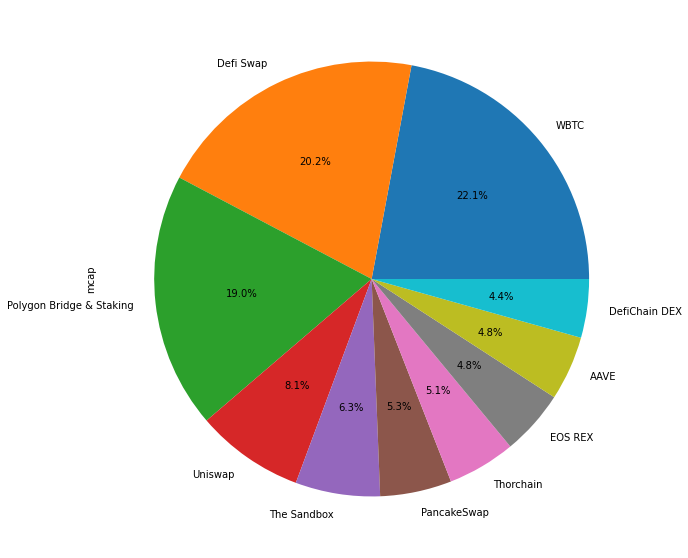

In [12]:
plot_data = df[['name', 'mcap']][:10]
plot_data.set_index(keys='name', inplace=True)
plot_data.plot(x='name', y='mcap', kind='pie', figsize=(10, 10), legend=False, autopct='%1.1f%%')

In [13]:
protocols = list(df['name'][:10])
protocols = [item.replace(' ', '-').lower() for item in protocols]
protocols

['wbtc',
 'defi-swap',
 'polygon-bridge-&-staking',
 'uniswap',
 'the-sandbox',
 'pancakeswap',
 'thorchain',
 'eos-rex',
 'aave',
 'defichain-dex']

Fetch historical TVl of a protcol and breakdowns by token and chain.\
The fields **tokensInUsd** and **tokens** are only available for some protocols.

In [14]:
# Get single protocol data
response = defillama().get_protocol('the-sandbox')
type(response)

dict

In [15]:
response.keys()

dict_keys(['id', 'name', 'address', 'symbol', 'url', 'description', 'chain', 'logo', 'audits', 'audit_note', 'gecko_id', 'cmcId', 'category', 'chains', 'module', 'twitter', 'listedAt', 'methodology', 'chainTvls', 'currentChainTvls', 'tvl', 'tokensInUsd', 'tokens'])

In [60]:
days = 120
df = pd.DataFrame()

for protocol in protocols:
    response = defillama().get_protocol(protocol)
    response = response['tvl']
    response.reverse()

    if 'date' not in df:
        df['date'] = pd.Series([response[idx]['date'] for idx in range(days) if idx <= len(response)-1])
        df['date'] = pd.to_datetime(df['date'],unit='s')

    df[protocol] = pd.Series([response[idx]['totalLiquidityUSD'] for idx in range(days) if idx <= len(response)-1])

df.sort_values(by='date', ascending=False, inplace=True)
df.set_index(keys='date', drop=True, inplace=True)
df.fillna(value=0, axis=1, inplace=True)
df.head()

,wbtc,defi-swap,polygon-bridge-&-staking,uniswap,the-sandbox,pancakeswap,thorchain,eos-rex,aave,defichain-dex
date,,,,,,,,,,
2022-04-23 00:15:27,1.116776e+10,4.535318e+07,1.081924e+10,7.405052e+09,0.0,5.035583e+09,4.770394e+08,1.296340e+08,1.202999e+10,8.838306e+08
2022-04-22 00:00:00,1.134611e+10,4.547129e+07,1.102590e+10,7.356818e+09,0.0,5.008325e+09,4.937708e+08,1.452752e+08,1.223424e+10,8.882805e+08
2022-04-21 00:00:00,1.163592e+10,4.644560e+07,1.115933e+10,7.406575e+09,0.0,5.176025e+09,4.905520e+08,1.396114e+08,1.285123e+10,8.881497e+08
2022-04-20 00:00:00,1.152831e+10,4.740041e+07,1.103166e+10,7.382826e+09,0.0,5.008789e+09,4.660508e+08,1.307723e+08,1.348349e+10,8.924290e+08
2022-04-19 00:00:00,1.142137e+10,4.828095e+07,1.063829e+10,7.365948e+09,0.0,4.962518e+09,4.446901e+08,1.293080e+08,1.347686e+10,8.847327e+08


array([[<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>]],
      dtype=object)

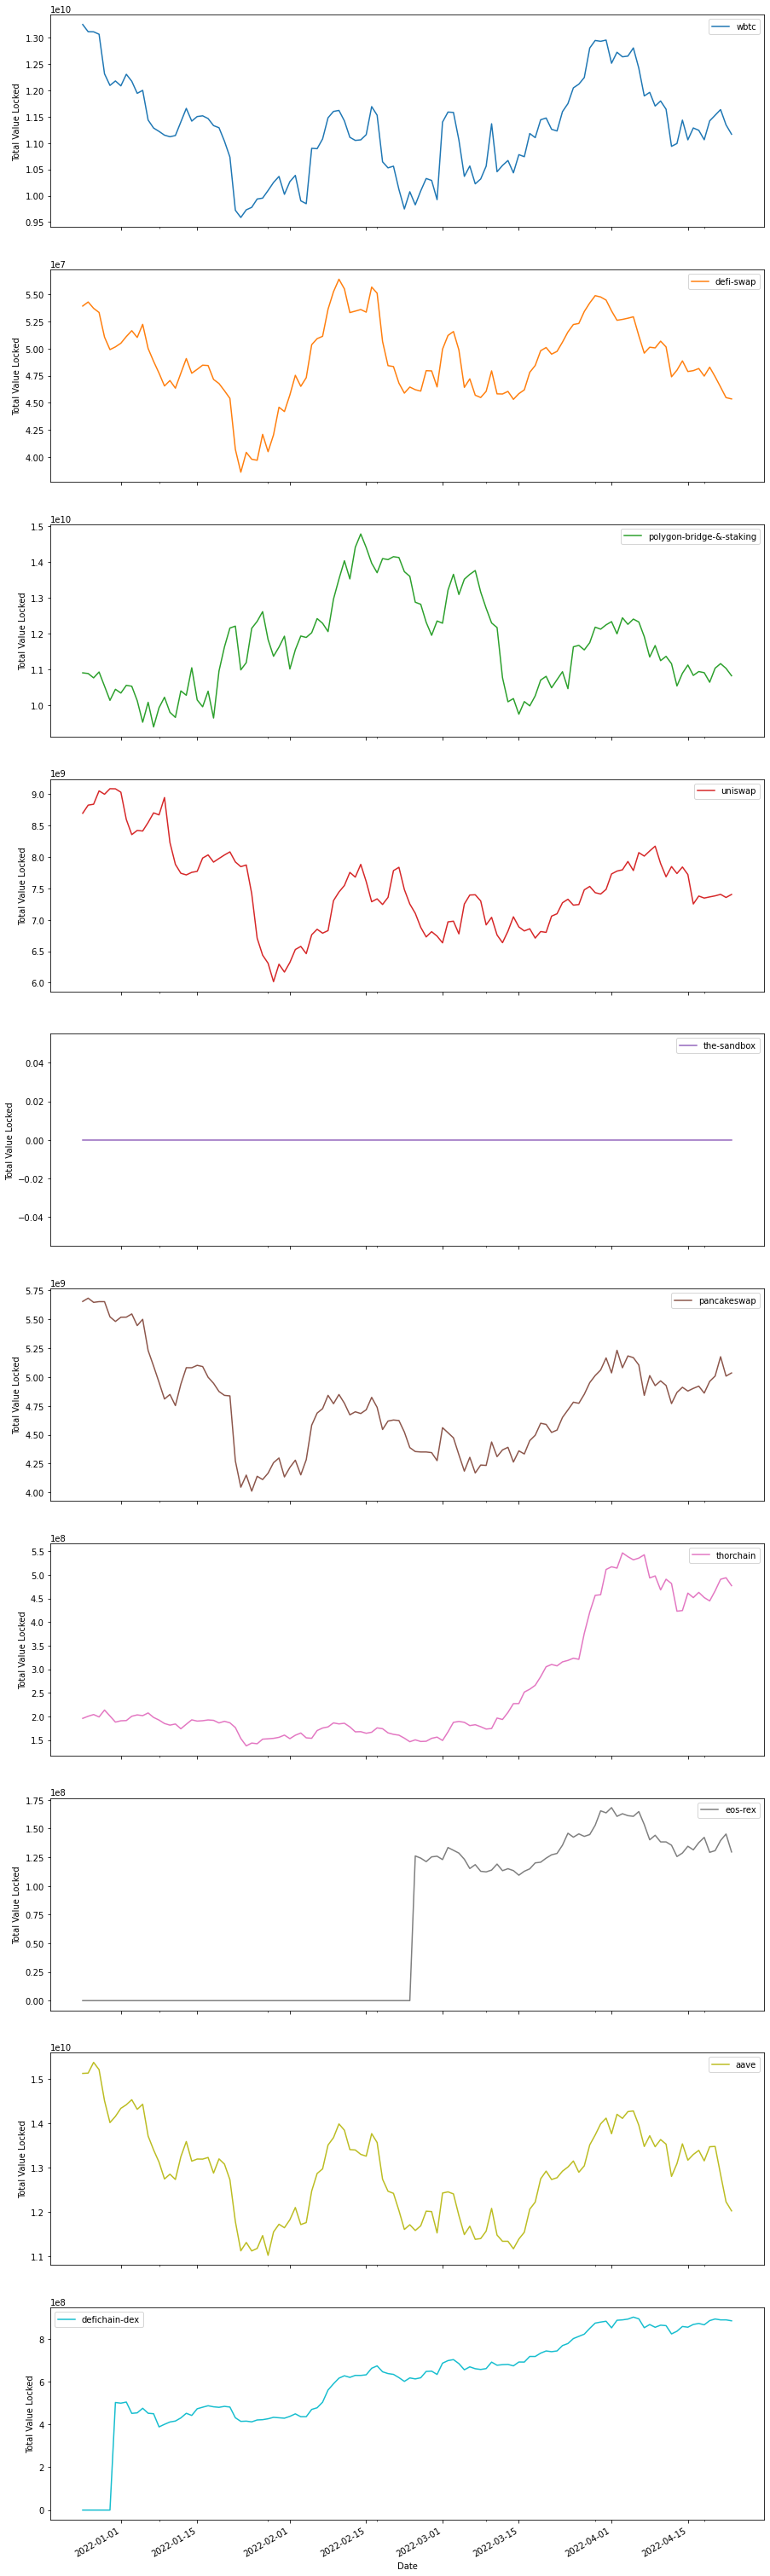

In [61]:
df.plot(subplots=True, layout=(10, 1), figsize=(15, 60), xlabel='Date', ylabel='Total Value Locked')

In [90]:
data = df[['polygon-bridge-&-staking']].copy()
data.rename(columns={'polygon-bridge-&-staking':'tvl'}, inplace=True)
data.reset_index(inplace=True)
data.head()

,date,tvl
0,2022-04-23 00:15:27,1.081924e+10
1,2022-04-22 00:00:00,1.102590e+10
2,2022-04-21 00:00:00,1.115933e+10
3,2022-04-20 00:00:00,1.103166e+10
4,2022-04-19 00:00:00,1.063829e+10


In [91]:
data_cds = cds(data)

In [92]:
data_df = copy.deepcopy(data)
data_df.columns = ['ds', 'y']

m = Prophet(interval_width=0.90, daily_seasonality=True)
model = m.fit(data_df)

future = m.make_future_dataframe(periods=4, freq='M')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [93]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-25,1.066202e+10,8.304199e+09,1.114566e+10,1.066202e+10,1.066202e+10,-8.708750e+08,-8.708750e+08,-8.708750e+08,-8.682513e+08,-8.682513e+08,-8.682513e+08,-2.623643e+06,-2.623643e+06,-2.623643e+06,0.0,0.0,0.0,9.791147e+09
1,2021-12-26,1.072228e+10,8.298831e+09,1.124047e+10,1.072228e+10,1.072228e+10,-8.881620e+08,-8.881620e+08,-8.881620e+08,-8.682513e+08,-8.682513e+08,-8.682513e+08,-1.991072e+07,-1.991072e+07,-1.991072e+07,0.0,0.0,0.0,9.834114e+09
2,2021-12-27,1.078253e+10,8.458618e+09,1.147005e+10,1.078253e+10,1.078253e+10,-8.399576e+08,-8.399576e+08,-8.399576e+08,-8.682513e+08,-8.682513e+08,-8.682513e+08,2.829370e+07,2.829370e+07,2.829370e+07,0.0,0.0,0.0,9.942573e+09
3,2021-12-28,1.084278e+10,8.320681e+09,1.131346e+10,1.084278e+10,1.084278e+10,-1.018034e+09,-1.018034e+09,-1.018034e+09,-8.682513e+08,-8.682513e+08,-8.682513e+08,-1.497828e+08,-1.497828e+08,-1.497828e+08,0.0,0.0,0.0,9.824751e+09
4,2021-12-29,1.090304e+10,8.620693e+09,1.144232e+10,1.090304e+10,1.090304e+10,-8.617129e+08,-8.617129e+08,-8.617129e+08,-8.682513e+08,-8.682513e+08,-8.682513e+08,6.538437e+06,6.538437e+06,6.538437e+06,0.0,0.0,0.0,1.004133e+10


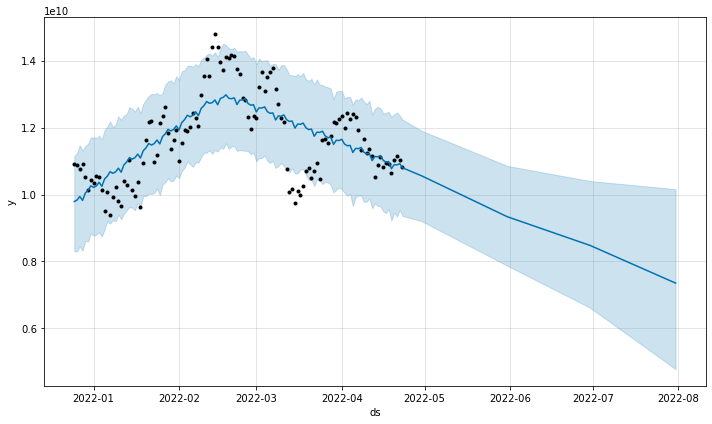

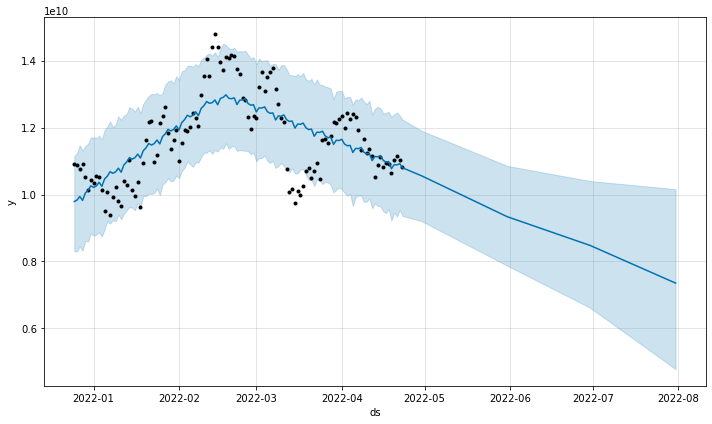

In [94]:
m.plot(forecast)

C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


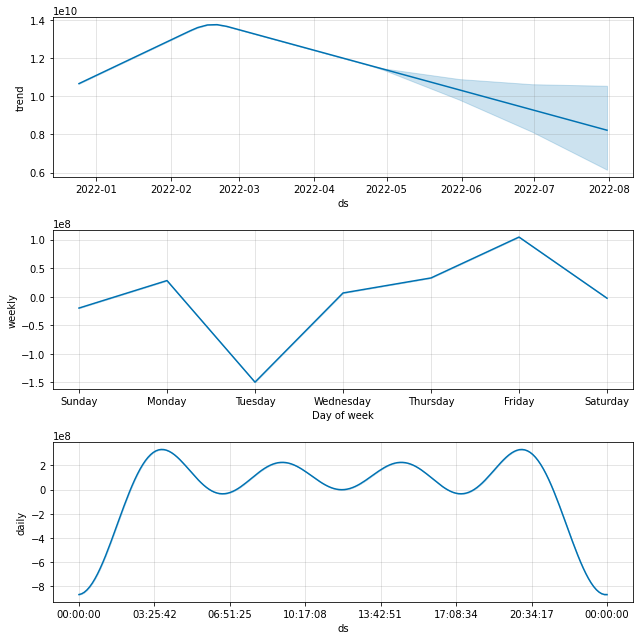

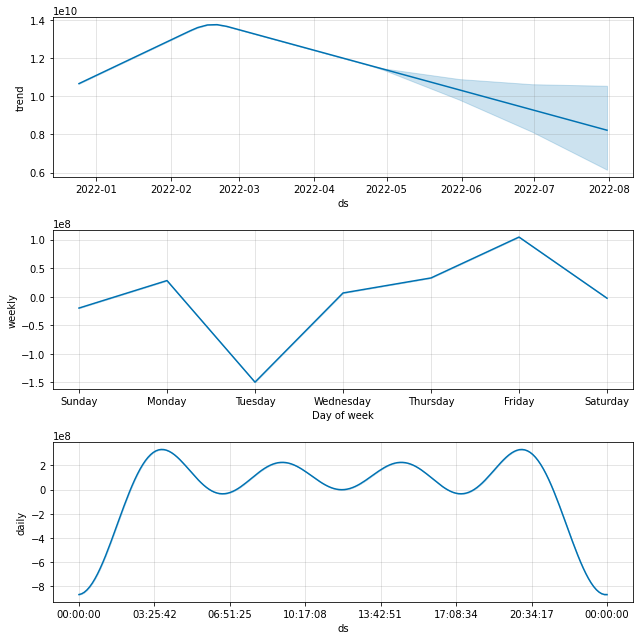

In [95]:
m.plot_components(forecast)

In [96]:
forecast['tvl'] = data.sort_values(by='date')['tvl']
forecast_cds = cds(forecast)

In [97]:
hover = HoverTool(tooltips = [('Date', '@ds{%F | %R}'),
                             ('Total Value Locked', '@tvl{($ 0.00 a)}'),
                             ('Upper Bound','@yhat_upper{($ 0.00 a)}'),
                             ('Prediction','@yhat{($ 0.00 a)}'),
                             ('Lower Bound','@yhat_lower{($ 0.00 a)}')],
                 formatters={'@ds': 'datetime'},
                 names=['ytd_aave'],
                 mode='vline')

In [98]:
p = figure(title="Model Prediction Comparison",x_axis_type="datetime", x_axis_label='Time', y_axis_label='Price_USD', plot_width=1000, plot_height=500)
p.line(source=data_cds, x='date', y='tvl', legend_label='TVL',line_width=2,color='red')
p.varea(source= forecast_cds, x='ds', y1 = 'yhat_lower',y2 = 'yhat_upper', legend_label="TVL Bounds", color="navy", alpha=0.2)
p.line(source= forecast_cds, x='ds', y = 'yhat', legend_label="Predicted TVL", line_width=2, color='blue', name='ytd_aave')
p.legend.location = "top_left"

prediction_start_date = time.mktime(dt(2022, 5, 1, 0, 0, 0).timetuple())*1000
prediction_start = Span(location=prediction_start_date,dimension='height', line_color='green',line_dash='dashed', line_width=3)
p.add_layout(prediction_start)

june_start_date = time.mktime(dt(2022, 6, 1, 0, 0, 0).timetuple())*1000
june_start = Span(location=june_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(june_start)

july_start_date = time.mktime(dt(2022, 7, 1, 0, 0, 0).timetuple())*1000
july_start = Span(location=july_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(july_start)

august_start_date = time.mktime(dt(2022, 8, 1, 0, 0, 0).timetuple())*1000
august_start = Span(location=august_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(august_start)

p.add_tools(hover)
p.yaxis.formatter=NumeralTickFormatter(format="$ 0.00 a")
show(p)

Fetch historical TVL of DeFi on all chains

In [107]:
# Get historical values of total TVL on all chains
response = defillama().get_charts()
type(response)

list

In [108]:
df = pd.DataFrame(response)
df['date'] = pd.to_datetime(df['date'],unit='s')
df.rename(columns={'totalLiquidityUSD':'tvl'}, inplace=True)
df['date'] = df['date'].dt.date
df.sort_values(by="date", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,date,tvl
0,2022-04-23,2.111409e+11
1,2022-04-22,2.111293e+11
2,2022-04-21,2.133463e+11
3,2022-04-20,2.140518e+11
4,2022-04-19,2.125286e+11
5,2022-04-18,1.995191e+11
6,2022-04-17,2.099528e+11
7,2022-04-16,2.096802e+11
8,2022-04-15,2.078801e+11
9,2022-04-14,2.121248e+11


<AxesSubplot:title={'center':'Historical TVL of all chains'}, xlabel='Date', ylabel='Total Value Locked'>

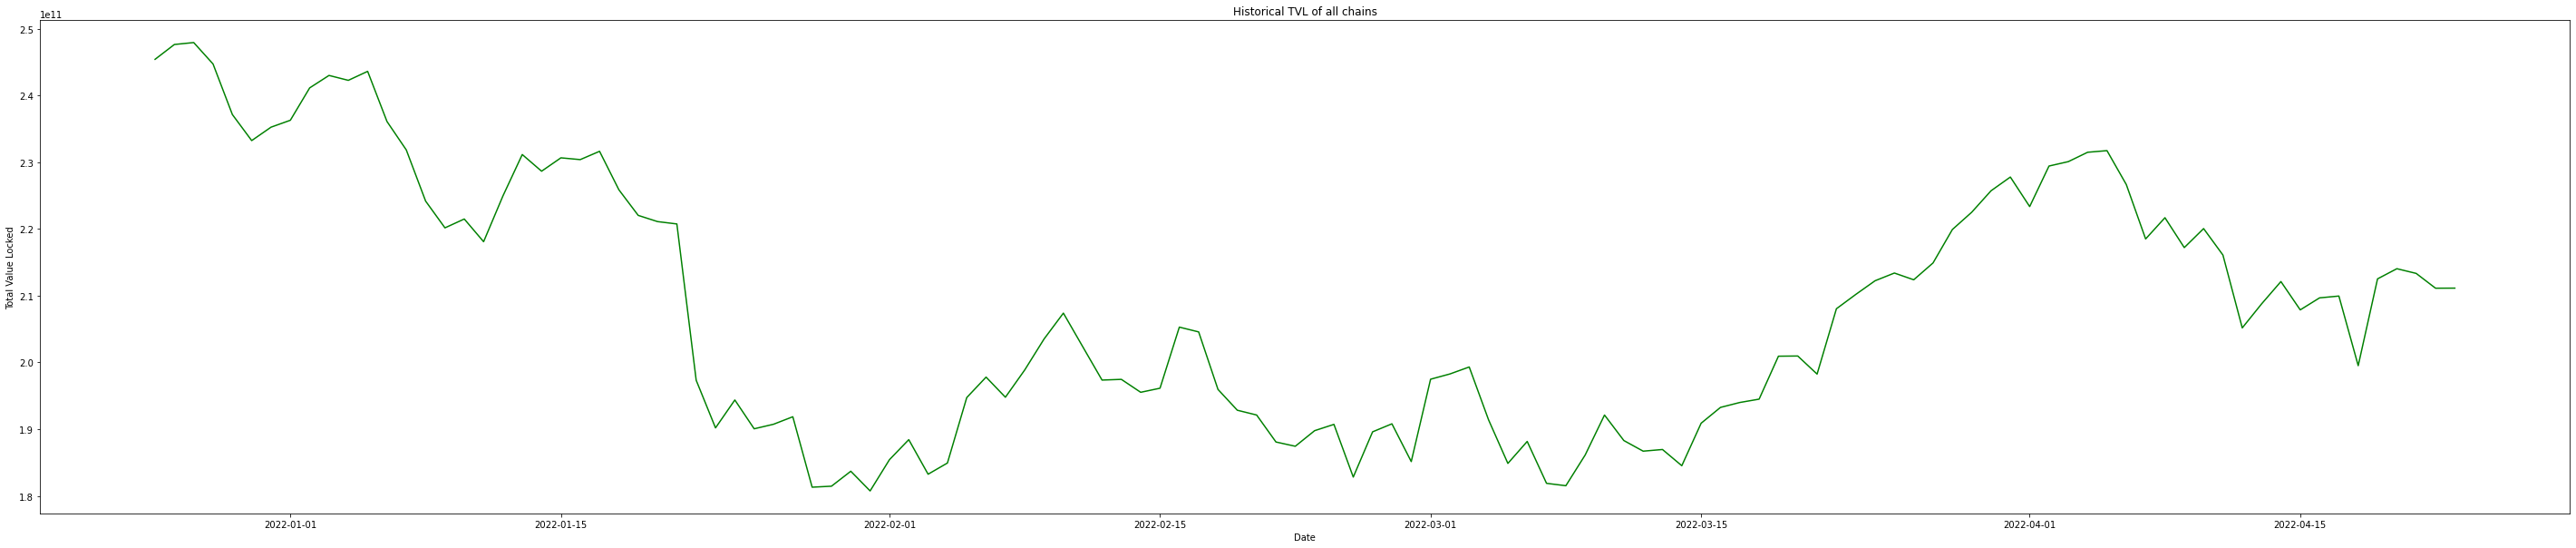

In [109]:
plot_data = df[:120]
plot_data.plot(x='date', y='tvl', kind='line', figsize=(50, 10), legend=False, sort_columns=True, color='green', xlabel='Date', ylabel='Total Value Locked', title='Historical TVL of all chains')

In [110]:
data = df[:120].copy()
data.head()

,date,tvl
0,2022-04-23,2.111409e+11
1,2022-04-22,2.111293e+11
2,2022-04-21,2.133463e+11
3,2022-04-20,2.140518e+11
4,2022-04-19,2.125286e+11


In [111]:
data_cds = cds(data)

In [112]:
data_df = copy.deepcopy(data)
data_df.columns = ['ds', 'y']

m = Prophet(interval_width=0.90, daily_seasonality=True)
model = m.fit(data_df)

future = m.make_future_dataframe(periods=4, freq='M')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [113]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-25,2.456798e+11,2.322901e+11,2.619631e+11,2.456798e+11,2.456798e+11,1.738889e+09,1.738889e+09,1.738889e+09,3.401465e+09,3.401465e+09,3.401465e+09,-1.662576e+09,-1.662576e+09,-1.662576e+09,0.0,0.0,0.0,2.474187e+11
1,2021-12-26,2.441933e+11,2.320771e+11,2.617659e+11,2.441933e+11,2.441933e+11,3.081175e+09,3.081175e+09,3.081175e+09,3.401465e+09,3.401465e+09,3.401465e+09,-3.202907e+08,-3.202907e+08,-3.202907e+08,0.0,0.0,0.0,2.472745e+11
2,2021-12-27,2.427068e+11,2.309095e+11,2.592446e+11,2.427068e+11,2.427068e+11,1.719604e+09,1.719604e+09,1.719604e+09,3.401465e+09,3.401465e+09,3.401465e+09,-1.681861e+09,-1.681861e+09,-1.681861e+09,0.0,0.0,0.0,2.444264e+11
3,2021-12-28,2.412202e+11,2.299206e+11,2.595796e+11,2.412202e+11,2.412202e+11,3.422071e+09,3.422071e+09,3.422071e+09,3.401465e+09,3.401465e+09,3.401465e+09,2.060533e+07,2.060533e+07,2.060533e+07,0.0,0.0,0.0,2.446423e+11
4,2021-12-29,2.397337e+11,2.297158e+11,2.610284e+11,2.397337e+11,2.397337e+11,5.406824e+09,5.406824e+09,5.406824e+09,3.401465e+09,3.401465e+09,3.401465e+09,2.005358e+09,2.005358e+09,2.005358e+09,0.0,0.0,0.0,2.451405e+11


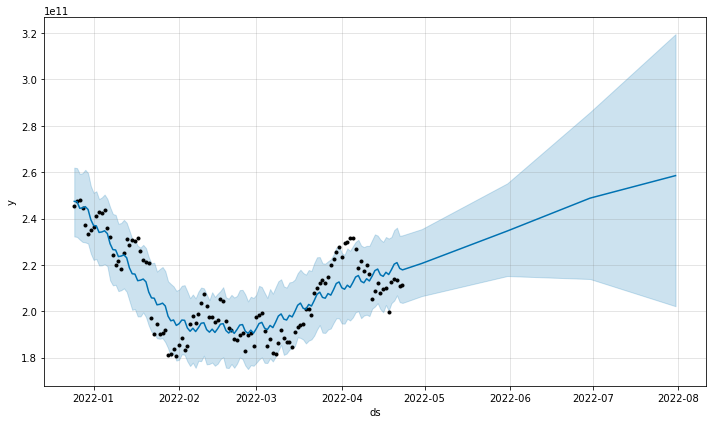

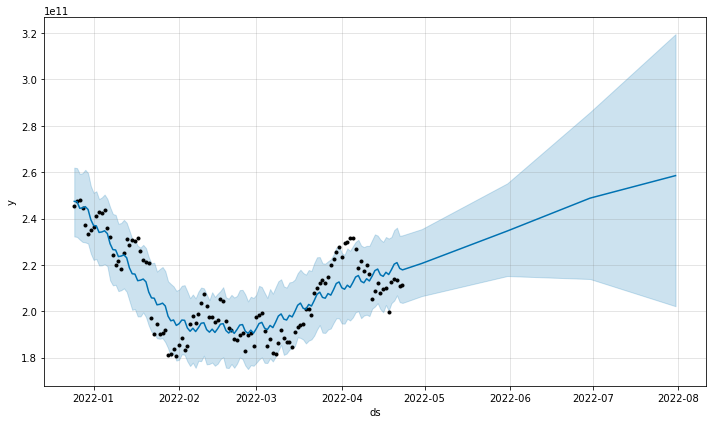

In [114]:
m.plot(forecast)

C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


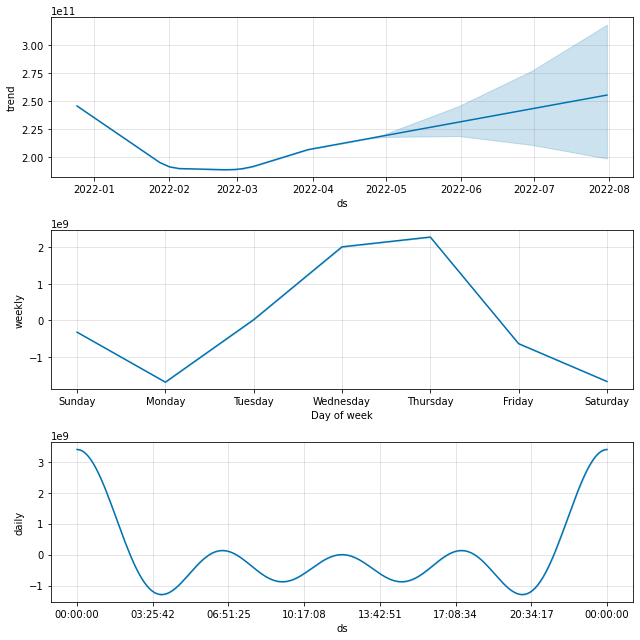

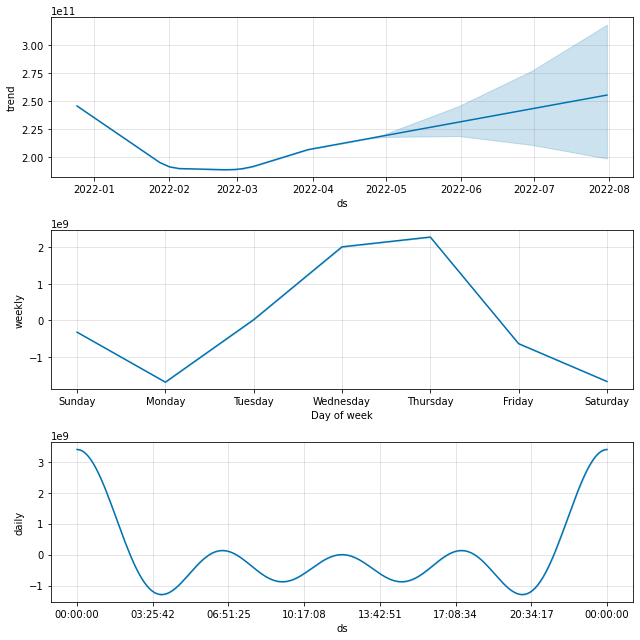

In [115]:
m.plot_components(forecast)

In [116]:
forecast['tvl'] = data.sort_values(by='date')['tvl']
forecast_cds = cds(forecast)

In [117]:
hover = HoverTool(tooltips = [('Date', '@ds{%F | %R}'),
                             ('Total Value Locked', '@tvl{($ 0.00 a)}'),
                             ('Upper Bound','@yhat_upper{($ 0.00 a)}'),
                             ('Prediction','@yhat{($ 0.00 a)}'),
                             ('Lower Bound','@yhat_lower{($ 0.00 a)}')],
                 formatters={'@ds': 'datetime'},
                 names=['ytd_aave'],
                 mode='vline')

In [118]:
p = figure(title="Model Prediction Comparison",x_axis_type="datetime", x_axis_label='Time', y_axis_label='Price_USD', plot_width=1000, plot_height=500)
p.line(source=data_cds, x='date', y='tvl', legend_label='TVL',line_width=2,color='red')
p.varea(source= forecast_cds, x='ds', y1 = 'yhat_lower',y2 = 'yhat_upper', legend_label="TVL Bounds", color="navy", alpha=0.2)
p.line(source= forecast_cds, x='ds', y = 'yhat', legend_label="Predicted TVL", line_width=2, color='blue', name='ytd_aave')
p.legend.location = "top_left"

prediction_start_date = time.mktime(dt(2022, 5, 1, 0, 0, 0).timetuple())*1000
prediction_start = Span(location=prediction_start_date,dimension='height', line_color='green',line_dash='dashed', line_width=3)
p.add_layout(prediction_start)

may_start_date = time.mktime(dt(2022, 6, 1, 0, 0, 0).timetuple())*1000
may_start = Span(location=may_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(may_start)

june_start_date = time.mktime(dt(2022, 7, 1, 0, 0, 0).timetuple())*1000
june_start = Span(location=june_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(june_start)

july_start_date = time.mktime(dt(2022, 8, 1, 0, 0, 0).timetuple())*1000
july_start = Span(location=july_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(july_start)

p.add_tools(hover)
p.yaxis.formatter=NumeralTickFormatter(format="$ 0.00 a")
show(p)

Fetch historical tvl of a chain

In [39]:
response = defillama().get_chart('Bitcoin')
type(response)

list

In [40]:
response

[{'date': '1616284800', 'totalLiquidityUSD': 64933228.56},
 {'date': '1616371200', 'totalLiquidityUSD': 65842440.83},
 {'date': '1616457600', 'totalLiquidityUSD': 62926579.2},
 {'date': '1616544000', 'totalLiquidityUSD': 62607414.24},
 {'date': '1616716800', 'totalLiquidityUSD': 60169756},
 {'date': '1616803200', 'totalLiquidityUSD': 63386771.16},
 {'date': '1616889600', 'totalLiquidityUSD': 64748628.04},
 {'date': '1616976000', 'totalLiquidityUSD': 64797039.45},
 {'date': '1617062400', 'totalLiquidityUSD': 67229351.56},
 {'date': '1617148800', 'totalLiquidityUSD': 68776081.5},
 {'date': '1617235200', 'totalLiquidityUSD': 69032777.06},
 {'date': '1617321600', 'totalLiquidityUSD': 68183027.05},
 {'date': '1617408000', 'totalLiquidityUSD': 68647014.4},
 {'date': '1617494400', 'totalLiquidityUSD': 66759527.02},
 {'date': '1617580800', 'totalLiquidityUSD': 68696060},
 {'date': '1617667200', 'totalLiquidityUSD': 70311416.84},
 {'date': '1617753600', 'totalLiquidityUSD': 68988388.55},
 {'dat

In [41]:
chains = ['bitcoin', 'ethereum', 'polygon']
df = pd.DataFrame()
days =120

for chain in chains:
    response = defillama().get_chart(chain)

    if 'date' not in df:
        df['date'] = pd.Series([response[idx]['date'] for idx in range(days) if idx <= len(response)-1])
        df['date'] = pd.to_datetime(df['date'],unit='s')

    df[chain] = pd.Series([response[idx]['totalLiquidityUSD'] for idx in range(days) if idx <= len(response)-1])

df.sort_values(by='date', ascending=False, inplace=True)
df.set_index(keys='date', drop=True, inplace=True)
df.fillna(value=0, axis=1, inplace=True)
df.head()

,bitcoin,ethereum,polygon
date,,,
2021-07-19,58260447.84,3.010838e+08,4.522288e+06
2021-07-18,59543358.57,2.964934e+08,4.517544e+06
2021-07-17,59238991.20,2.987674e+08,4.567429e+06
2021-07-16,58742076.25,2.955050e+08,4.528210e+06
2021-07-15,58877684.32,2.961287e+08,4.764689e+06


array([[<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>],
       [<AxesSubplot:xlabel='Date', ylabel='Total Value Locked'>]],
      dtype=object)

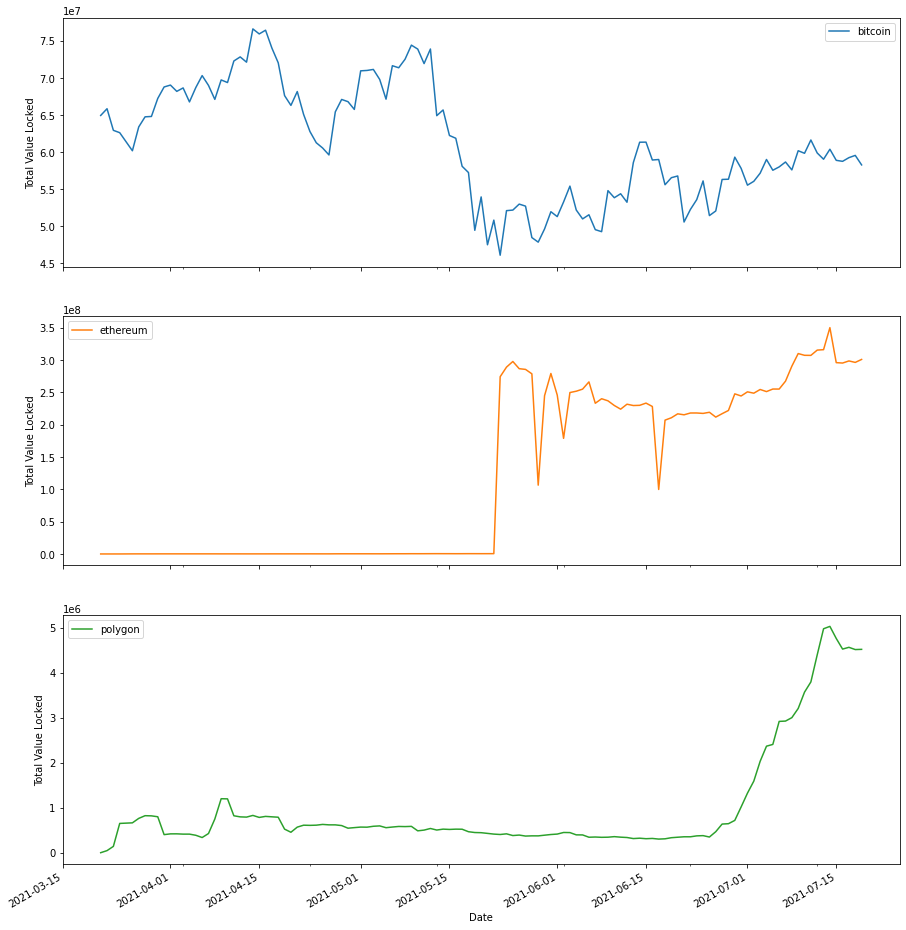

In [42]:
df.plot(subplots=True, layout=(10, 1), figsize=(15, 60), xlabel='Date', ylabel='Total Value Locked')

In [43]:
data = df[['bitcoin']].copy()
data.rename(columns={'bitcoin':'tvl'}, inplace=True)
data.reset_index(inplace=True)
data.head()

,date,tvl
0,2021-07-19,58260447.84
1,2021-07-18,59543358.57
2,2021-07-17,59238991.20
3,2021-07-16,58742076.25
4,2021-07-15,58877684.32


In [44]:
data_cds = cds(data)

In [45]:
data_df = copy.deepcopy(data)
data_df.columns = ['ds', 'y']

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(data_df)

future = m.make_future_dataframe(periods=3, freq='M')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [46]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-21,6.581875e+07,5.936977e+07,7.961749e+07,6.581875e+07,6.581875e+07,4.058566e+06,4.058566e+06,4.058566e+06,3.952829e+06,3.952829e+06,3.952829e+06,105737.450207,105737.450207,105737.450207,0.0,0.0,0.0,6.987731e+07
1,2021-03-22,6.573161e+07,5.979946e+07,7.869887e+07,6.573161e+07,6.573161e+07,3.728927e+06,3.728927e+06,3.728927e+06,3.952829e+06,3.952829e+06,3.952829e+06,-223902.047317,-223902.047317,-223902.047317,0.0,0.0,0.0,6.946054e+07
2,2021-03-23,6.564448e+07,5.923009e+07,7.966437e+07,6.564448e+07,6.564448e+07,4.027829e+06,4.027829e+06,4.027829e+06,3.952829e+06,3.952829e+06,3.952829e+06,74999.980853,74999.980853,74999.980853,0.0,0.0,0.0,6.967231e+07
3,2021-03-24,6.555735e+07,5.957582e+07,7.976438e+07,6.555735e+07,6.555735e+07,4.557351e+06,4.557351e+06,4.557351e+06,3.952829e+06,3.952829e+06,3.952829e+06,604522.423458,604522.423458,604522.423458,0.0,0.0,0.0,7.011470e+07
4,2021-03-26,6.538308e+07,5.818058e+07,7.766568e+07,6.538308e+07,6.538308e+07,3.085759e+06,3.085759e+06,3.085759e+06,3.952829e+06,3.952829e+06,3.952829e+06,-867069.949505,-867069.949505,-867069.949505,0.0,0.0,0.0,6.846884e+07


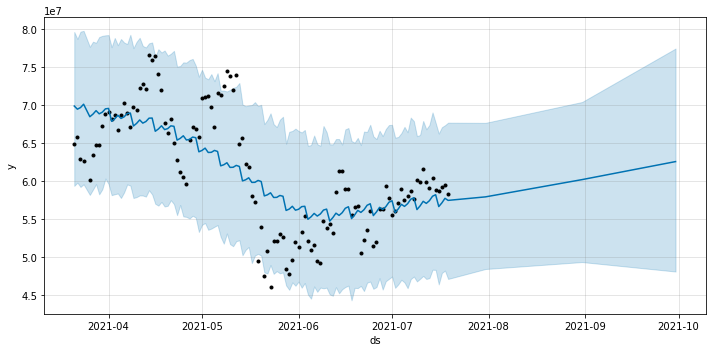

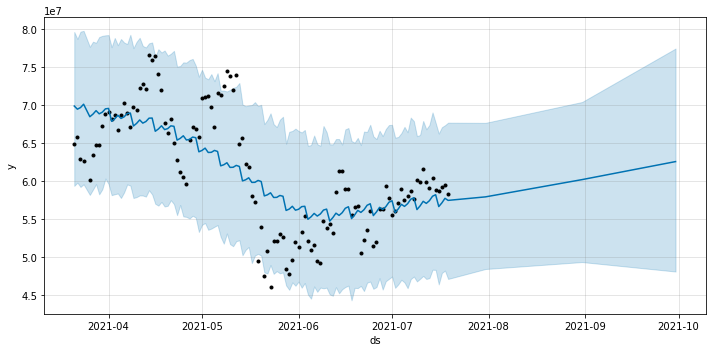

In [47]:
m.plot(forecast, figsize=(10, 5))

C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\praxs\miniconda3\envs\ml\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


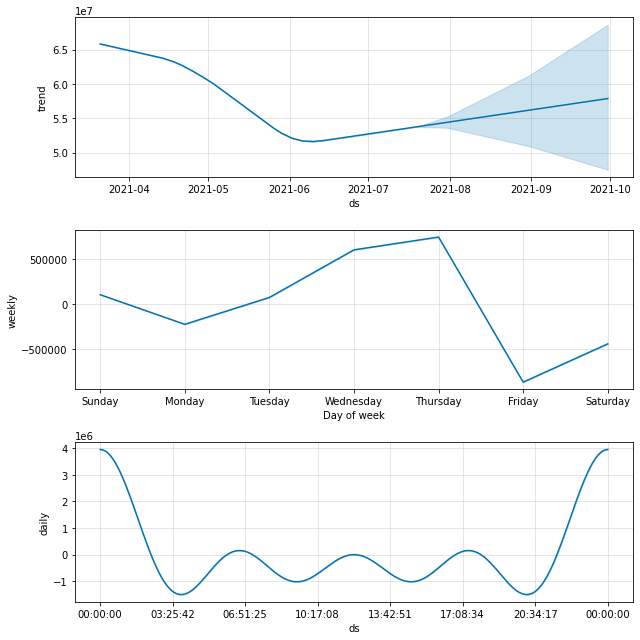

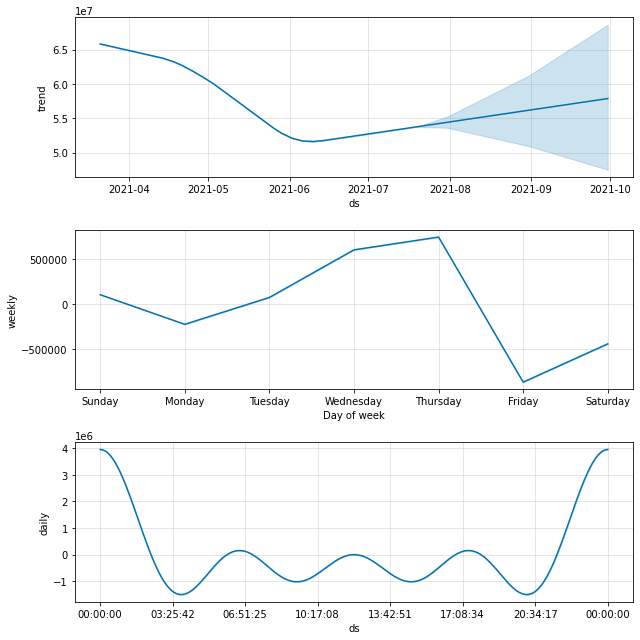

In [48]:
m.plot_components(forecast)

In [49]:
forecast['tvl'] = data.sort_values(by='date')['tvl']
forecast_cds = cds(forecast)

In [50]:
hover = HoverTool(tooltips = [('Date', '@ds{%F | %R}'),
                             ('Total Value Locked', '@tvl{($ 0.00 a)}'),
                             ('Upper Bound','@yhat_upper{($ 0.00 a)}'),
                             ('Prediction','@yhat{($ 0.00 a)}'),
                             ('Lower Bound','@yhat_lower{($ 0.00 a)}')],
                 formatters={'@ds': 'datetime'},
                 names=['ytd_aave'],
                 mode='vline')

In [51]:
p = figure(title="Model Prediction Comparison",x_axis_type="datetime", x_axis_label='Time', y_axis_label='Price_USD', plot_width=1000, plot_height=500)
p.line(source=data_cds, x='date', y='tvl', legend_label='TVL',line_width=2,color='red')
p.varea(source= forecast_cds, x='ds', y1 = 'yhat_lower',y2 = 'yhat_upper', legend_label="TVL Bounds", color="navy", alpha=0.2)
p.line(source= forecast_cds, x='ds', y = 'yhat', legend_label="Predicted TVL", line_width=2, color='blue', name='ytd_aave')
p.legend.location = "top_left"

prediction_start_date = time.mktime(dt(2022, 5, 1, 0, 0, 0).timetuple())*1000
prediction_start = Span(location=prediction_start_date,dimension='height', line_color='green',line_dash='dashed', line_width=3)
p.add_layout(prediction_start)

may_start_date = time.mktime(dt(2022, 6, 1, 0, 0, 0).timetuple())*1000
may_start = Span(location=may_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(may_start)

june_start_date = time.mktime(dt(2022, 7, 1, 0, 0, 0).timetuple())*1000
june_start = Span(location=june_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(june_start)

july_start_date = time.mktime(dt(2022, 8, 1, 0, 0, 0).timetuple())*1000
july_start = Span(location=july_start_date,dimension='height', line_color='magenta',line_dash='dashed', line_width=1)
p.add_layout(july_start)

p.add_tools(hover)
p.yaxis.formatter=NumeralTickFormatter(format="$ 0.00 a")
show(p)

End of Notebook